Link to competition: https://www.kaggle.com/c/fungi-challenge-fgvc-2018/overview

# Preparations

In [1]:
%reload_ext autoreload
%matplotlib inline
%autoreload 2

In [2]:
from fastai.vision import * 
import json
from os import listdir
from fungi_functions import *

In [3]:
np.random.seed(1991)

How many training examples are processed in one iteration. If you face memory errors, decrease the batch size

In [4]:

batch_size = 64

In [5]:
listdir("/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/fungi/data/models")

['resnet34_t2_128_stage2.pth',
 'tmp.pth',
 'resnet34_t1_128_stage1.pth',
 'resnet34_t1_128_stage2.pth',
 '.ipynb_checkpoints',
 'resnet34_t2_128_stage1.pth']

In [6]:
model_name = "resnet34_t1_128_stage1"

In [16]:
model, tfms, t, image_size = load_variables(model_name)

In [17]:
print(model)
print(tfms)
print(t)
print(image_size)

<function resnet34 at 0x7fa1542af950>
None
t1
128


# Loading Data

In [18]:
data_path_str = "data"
train_path_str = "train"
test_path_str = "test"

In [19]:
original_data = ImageDataBunch.from_folder(
    path = data_path_str,
    train = train_path_str,
    test = test_path_str,
    size = image_size,
    ds_tfms = tfms,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

In [20]:
image_size = 256

In [21]:
new_data = ImageDataBunch.from_folder(
    path = data_path_str,
    train = train_path_str,
    test = test_path_str,
    size = image_size,
    ds_tfms = tfms,
    bs = batch_size,
    valid_pct = 0.2
).normalize(imagenet_stats)

# Progressive resizing

In [22]:
top_k_accuracy_3 = partial(top_k_accuracy, k=3)

In [23]:
learner = cnn_learner(original_data, model, metrics=top_k_accuracy_3)

In [24]:
learner.load(model_name)

Learner(data=ImageDataBunch;

Train: LabelList (71808 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus,67347_Gliophorus_irrigatus
Path: data;

Valid: LabelList (17952 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
61255_Coprinopsis_stercorea,10235_Amanita_gemmata,19336_Deconica_montana,10266_Amanita_strobiliformis,21143_Tricholoma_scalpturatum
Path: data;

Test: LabelList (9758 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [25]:
learner.data = new_data

In [26]:
learner.freeze()

epoch,train_loss,valid_loss,top_k_accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


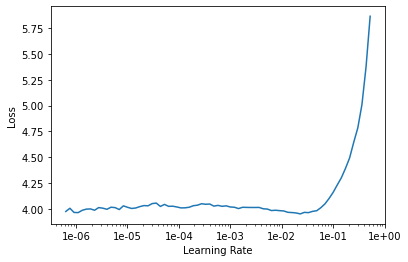

In [27]:
learner.lr_find()
learner.recorder.plot()

In [29]:
lr = 1e-02 * 2/3

In [30]:
fit_one_cycle(learner, 5, max_lr=lr)

epoch,train_loss,valid_loss,top_k_accuracy,time
0,3.838009,3.298131,0.493204,09:31
1,3.902649,3.503381,0.460506,09:32
2,3.525221,3.067379,0.537377,09:39
3,3.042362,2.725273,0.599822,09:40
4,2.710251,2.638931,0.615085,09:39


In [31]:
file_name = "_".join([model.__name__, t ,str(image_size), "stage1"]);file_name

'resnet34_t1_256_stage1'

In [ ]:
learner.save(file_name)